In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# random_state - whatever value we provide in random state then it will always generate same random data
# cluster_std = it acts like a noise parameter that how much noise we want in our dataset
data, _ = make_blobs(n_samples=500, centers=3, random_state=10, cluster_std=1.5)

In [17]:
data[:5]

array([[  2.75746837,   7.17456016],
       [  5.53633738,  -7.82436239],
       [ -0.15431056,   3.89980933],
       [  6.6669108 , -12.51672919],
       [  2.96366561,   5.79093028]])

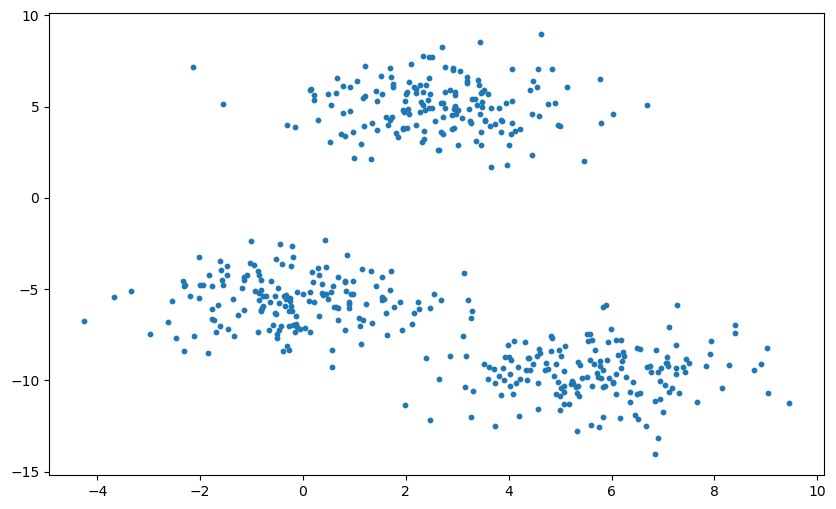

In [14]:
plt.figure(figsize = (10,6))
plt.scatter(data[:,0], data[:,1], s=10)
plt.show()

In [45]:
k = 3
centroid_x = np.random.randint(np.min(data[:,0]), np.max(data[:,1]), size=3)
centroid_y = np.random.randint(np.min(data[:,0]), np.max(data[:,1]), size=3)

In [46]:
centroid_x, centroid_y

(array([-3,  3,  2]), array([ 3, -4, -3]))

In [47]:
centroids = np.array([centroid_x, centroid_y]).T

In [48]:
centroids

array([[-3,  3],
       [ 3, -4],
       [ 2, -3]])

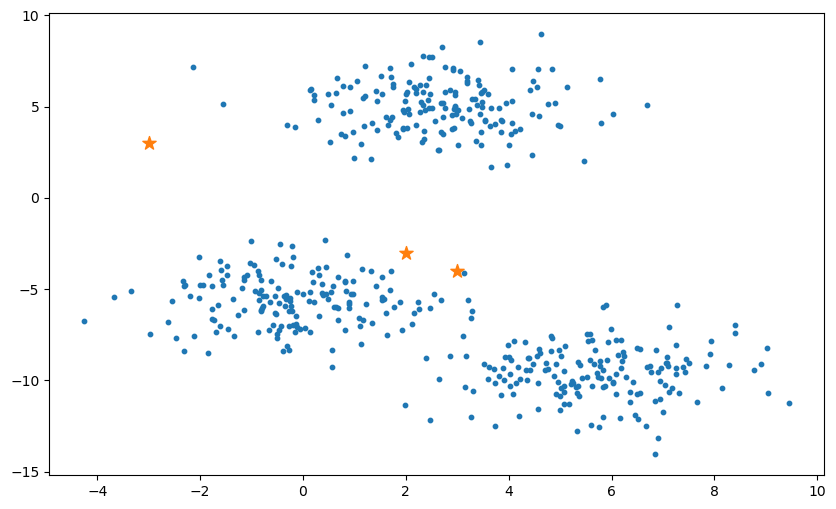

In [49]:
plt.figure(figsize = (10,6))
plt.scatter(data[:,0], data[:,1], s=10)
plt.scatter(centroid_x, centroid_y, s=100, marker='*')
plt.show()

In [50]:
def euclideanDistance(a, b, axis=1):
    return np.linalg.norm(a - b, axis=axis)

In [51]:
centroids_old = np.zeros_like(centroids)

In [52]:
centroids_old

array([[0, 0],
       [0, 0],
       [0, 0]])

In [53]:
clusters = np.zeros(len(data))

In [54]:
error = euclideanDistance(centroids, centroids_old, axis=None)

In [55]:
error

7.483314773547883

In [56]:
def plotData(clusters, centroid):
    colors = ['r','g','b']
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        ax.scatter(points[:,0], points[:,1], s=10, c=colors[i])
    ax.scatter(centroids[:,0], centroids[:,1], marker="*", s=100)
    plt.show()

In [57]:
from copy import deepcopy

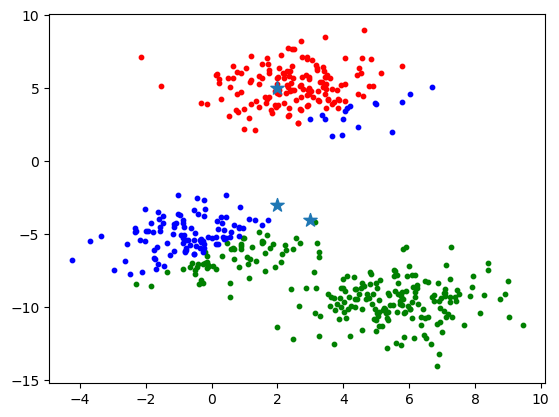

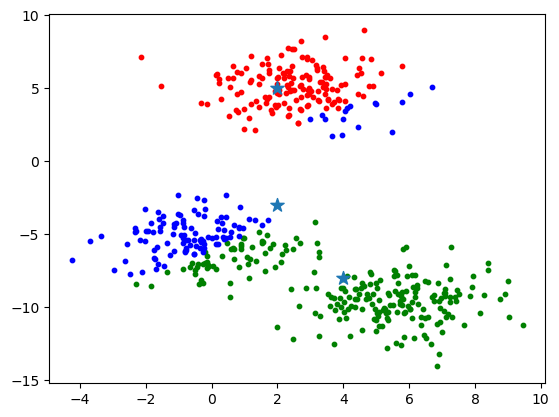

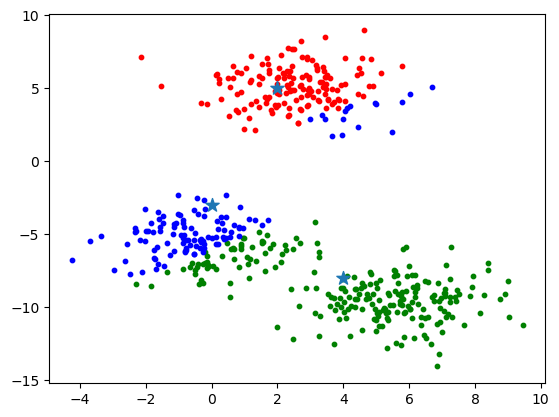

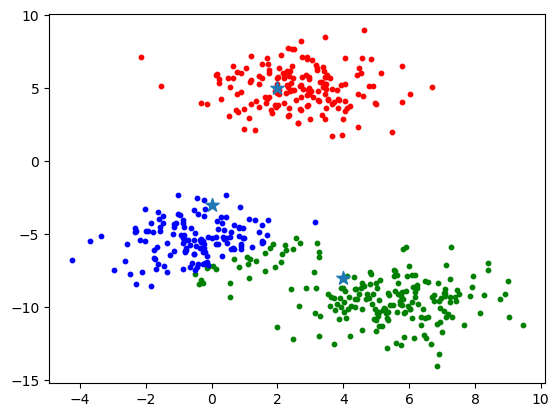

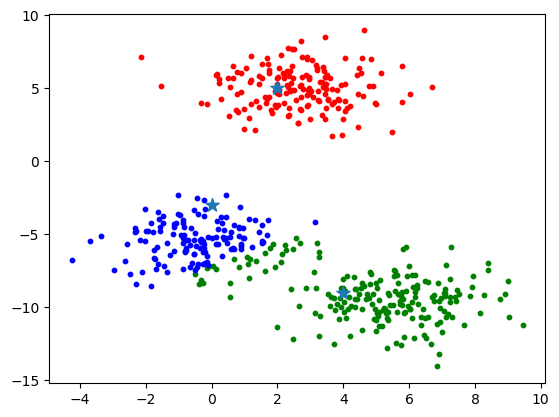

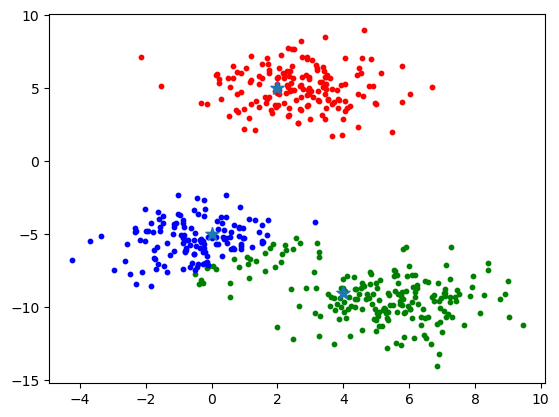

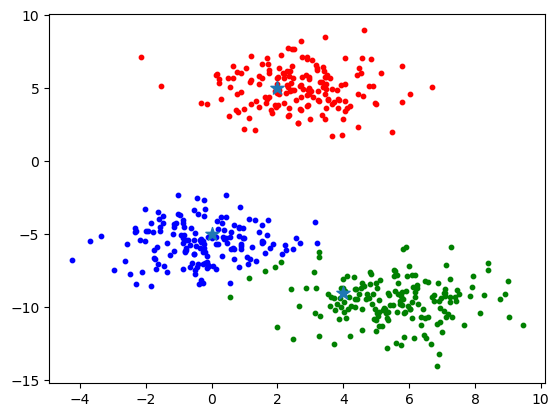

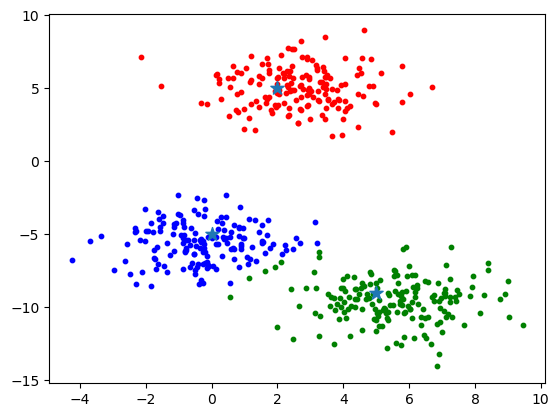

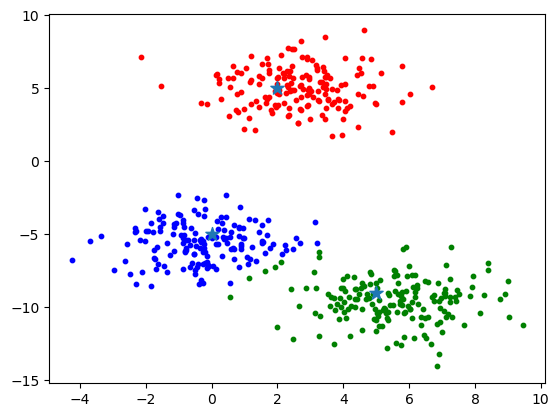

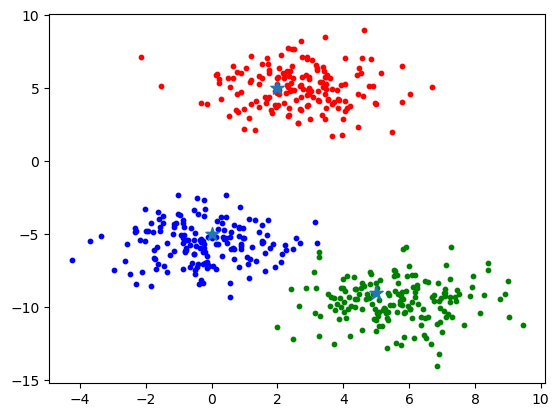

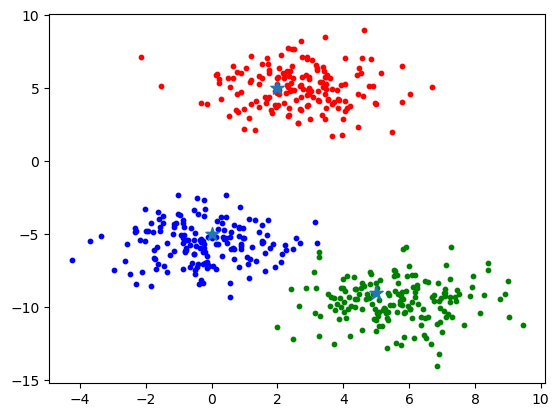

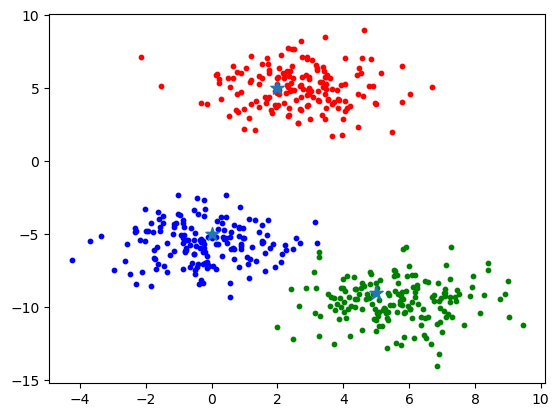

In [58]:
while error != 0:
    for i in range(len(data)):
        distance = euclideanDistance(data[i], centroids)
        cluster = np.argmin(distance)
        clusters[i] = cluster
    centroids_old = deepcopy(centroids)
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        centroids[i] = np.mean(points, axis=0)
        plotData(clusters, centroids)
    error = euclideanDistance(centroids, centroids_old, None)